<a href="https://colab.research.google.com/github/mirada725/Obesity-level-prediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Obesity Level prediction**

Group number - 29

Group Members :  
EG/2021/4634 - Kumarathissa A.D.I.U.  
EG/2021/4646 - Levmanthi K.G.M.

## **Introduction**

This project aims to classify obesity levels in individuals based on their various health and lifestyle
attributes. By analyzing a dataset containing multiple features related to diet, physical activity, and
personal characteristics, we intend to apply machine learning algorithms to predict the obesity level of
everyone.

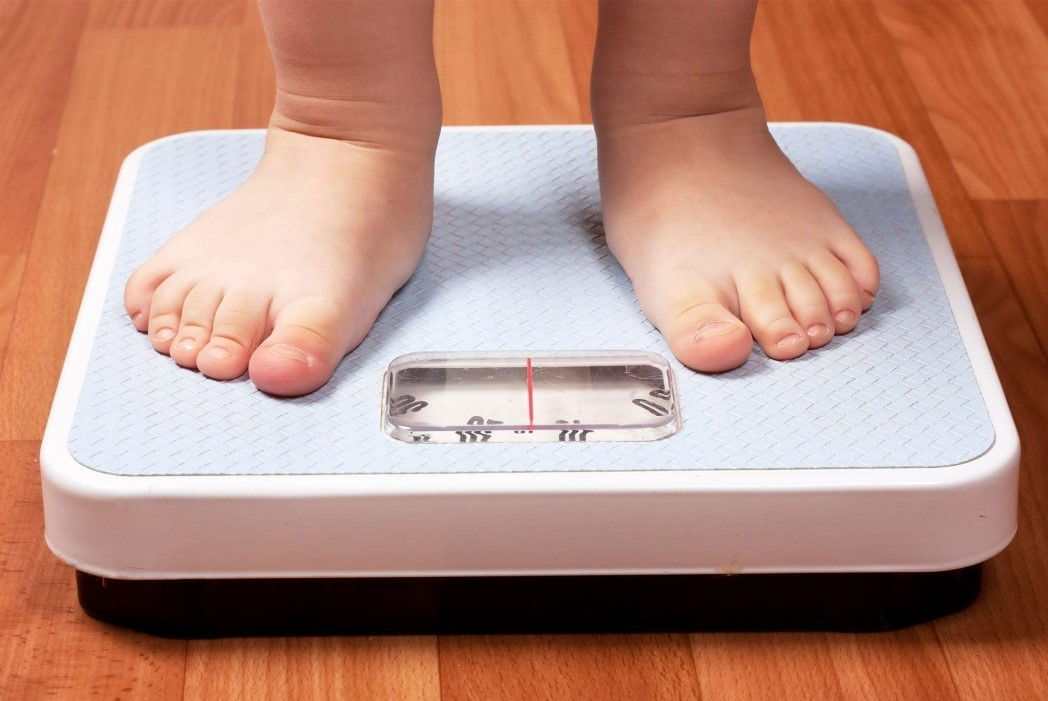



## **Literature Survey**



Obesity is strongly associated with multiple risk factors. It is significantly contributing to an increased risk of chronic disease morbidity and mortality worldwide. There are various challenges to better understand the association between risk factors and the occurrence of obesity. The traditional regression approach limits analysis to a small number of predictors and imposes assumptions of independence and linearity. Machine Learning methods are an alternative that provide information with a unique approach to the application stage of data analysis on obesity. Various ML techniques have been utilized to analyze datasets containing demographic, behavioral, and physiological factors to classify obesity levels or predict obesity-related risks.


Several studies have successfully applied machine learning models to predict obesity. Random Forest and Support Vector Machines (SVM) are popular models due to their ability to handle complex, non-linear relationships in data:


*   Random Forest: This ensemble model, known for its robustness, has been widely used in obesity prediction due to its ability to handle high-dimensional data and its resilience to overfitting. In studies like those by Dugan et al. (2019), Random Forest has shown success in identifying key factors contributing to obesity [1]
*   SVM: SVM's ability to map data to higher-dimensional spaces has been useful for handling complex patterns, making it a strong choice for obesity classification tasks. Research by Zheng et al. (2017) found SVM particularly useful for obesity classification tasks due to its strong generalization capabilities. [2]

The performance of ML models in obesity prediction is typically evaluated using metrics such as accuracy, precision, recall, and AUC-ROC. Studies like those by Zheng et al. (2017) emphasized the need for model evaluation across different datasets to understand generalization capabilities.
 [3]





## **Data Description**

The data set that we are using contains data of individuals from Mexico, Peru, and
Columbia. This includes 17 attributes including the target and 2111 records. This classification
targets seven levels; insufficient weight, normal weight, overweight I, overweight II, obesity type
I, obesity type II, and obesity type III. This will help us to understand the factors of obesity and
provide insights that can inform public health strategies.

### Features:


| **Feature Name**                | **Type**       | **Description**                                                                            |
|----------------------------------|----------------|--------------------------------------------------------------------------------------------|
| Gender                          | Categorical    | Gender of the individual.                                                                 |
| Age                             | Continuous     | Age of the individual in years.                                                           |
| Height                          | Continuous     | Height of the individual (in meters).                                                     |
| Weight                          | Continuous     | Weight of the individual (in kilograms).                                                  |
| family_history_with_overweight  | Binary         | Has a family member suffered or suffers from overweight?                                  |
| FAVC                            | Binary         | Do you eat high-caloric food frequently?                                                  |
| FCVC                            | Integer        | Do you usually eat vegetables in your meals?                                              |
| NCP                             | Continuous     | Number of main meals consumed daily.                                                      |
| CAEC                            | Categorical    | Do you eat any food between meals?                                                        |
| SMOKE                           | Binary         | Do you smoke?                                                                             |
| CH2O                            | Continuous     | Amount of water consumed daily (liters).                                                  |
| SCC                             | Binary         | Do you monitor the calories you eat daily?                                                |
| FAF                             | Continuous     | How often do you have physical activity (hours/week)?                                     |
| TUE                             | Integer        | Time spent using technological devices daily (hours).                                     |
| CALC                            | Categorical    | How often do you drink alcohol?                                                           |
| MTRANS                          | Categorical    | Mode of transportation usually used.                                                      |



### Target:


| **Target Name**                | **Type**       | **Description**                                                                            |
|----------------------------------|----------------|--------------------------------------------------------------------------------------------|
| NObeyesdad                      | Categorical    | Obesity level                                                           |



Dataset Link:https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels?resource=download

**Importing Dataset and Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file_path)

In [ ]:
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#Dimensions of the dataframe
data.shape

(2111, 17)

In [ ]:
#Summary of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
# seperating features and target

X = data.drop('NObeyesdad',axis = 1)
Y = data.NObeyesdad

In [ ]:
X.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


**Train and Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## **Exploratory Data Analysis**

In [ ]:
X_train.shape

(1688, 16)

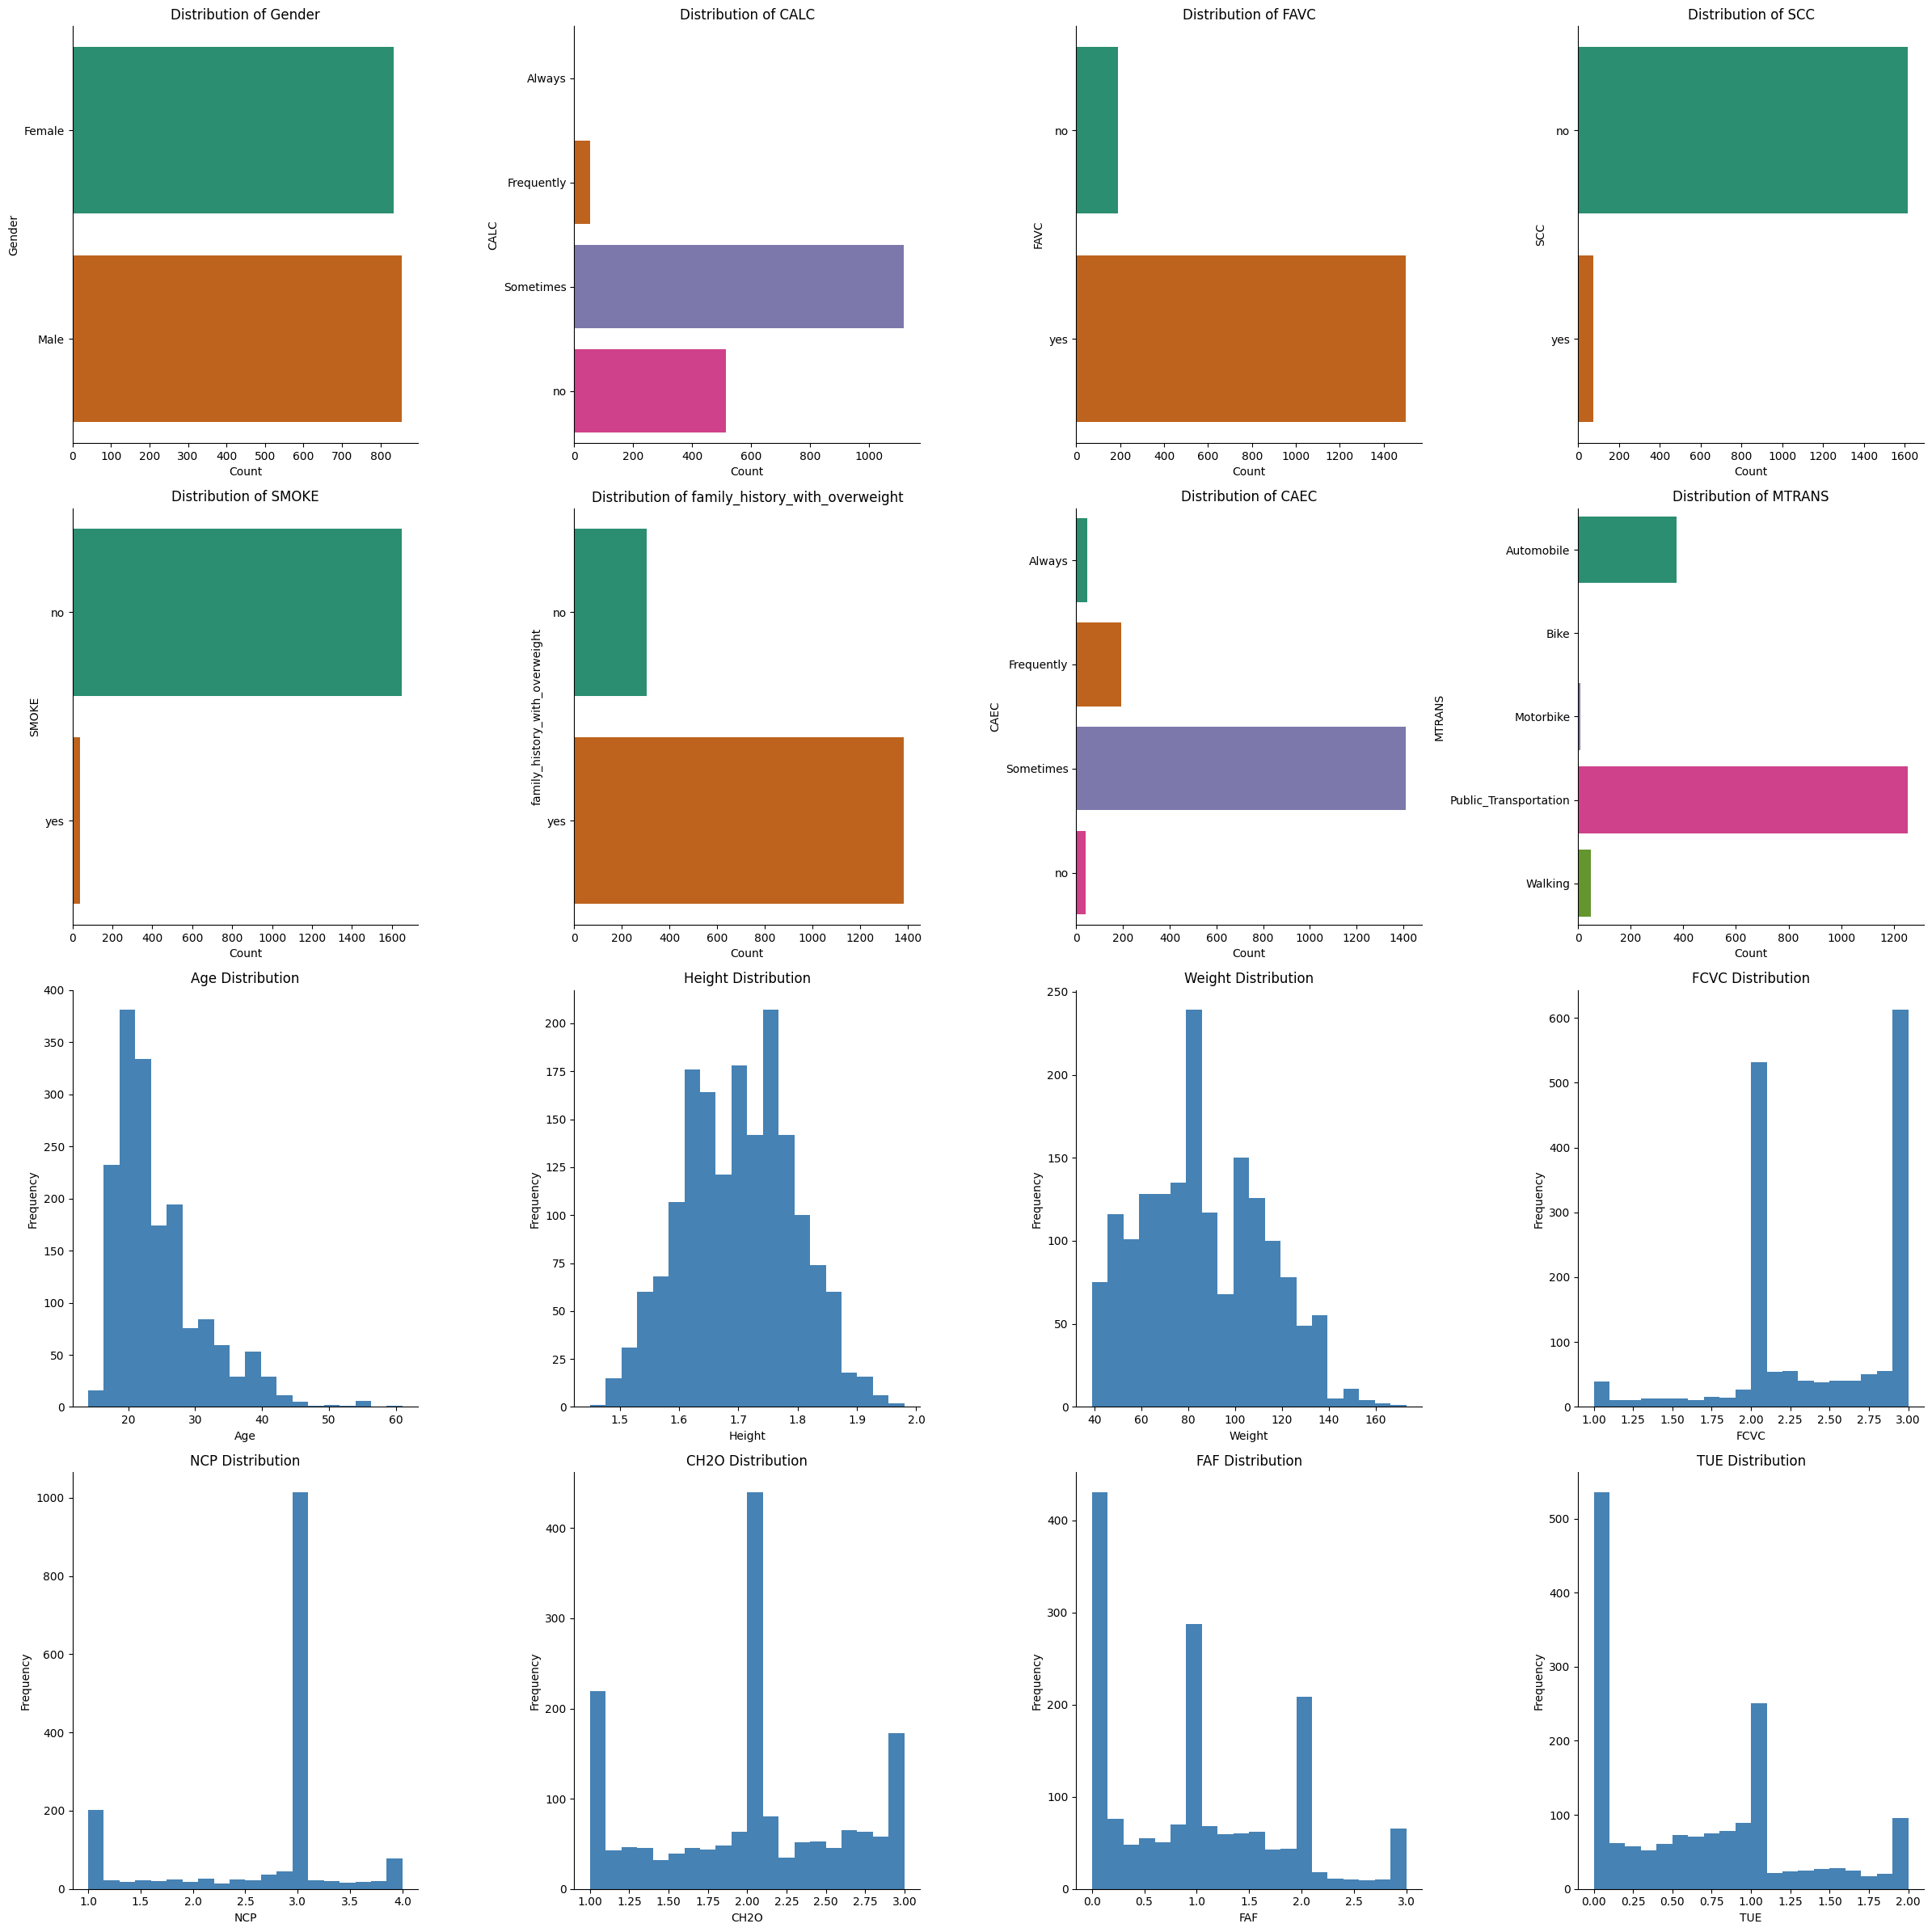

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

categorical_features = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
                        'family_history_with_overweight', 'CAEC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                      'CH2O', 'FAF', 'TUE']

total_features = len(categorical_features) + len(numerical_features)

rows = (total_features + 3) // 4
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(24, 6 * rows))
axes = axes.flatten()

# Plot categorical features
for i, feature in enumerate(categorical_features):
    sns.barplot(
        x=X_train.groupby(feature).size().values,
        y=X_train.groupby(feature).size().index,
        hue=X_train.groupby(feature).size().index,
        ax=axes[i],
        palette=sns.color_palette('Dark2', len(X_train[feature].unique())),
        legend=False
    )
    axes[i].set_title(f"Distribution of {feature}", fontsize=12)
    axes[i].set_xlabel("Count", fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].spines[['top', 'right']].set_visible(False)

# Plot numerical features
for j, feature in enumerate(numerical_features, start=len(categorical_features)):
    X_train[feature].plot(
        kind='hist',
        bins=20,
        ax=axes[j],
        color='steelblue',
        title=f"{feature} Distribution"
    )
    axes[j].set_xlabel(feature, fontsize=10)
    axes[j].spines[['top', 'right']].set_visible(False)

for k in range(len(categorical_features) + len(numerical_features), len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()


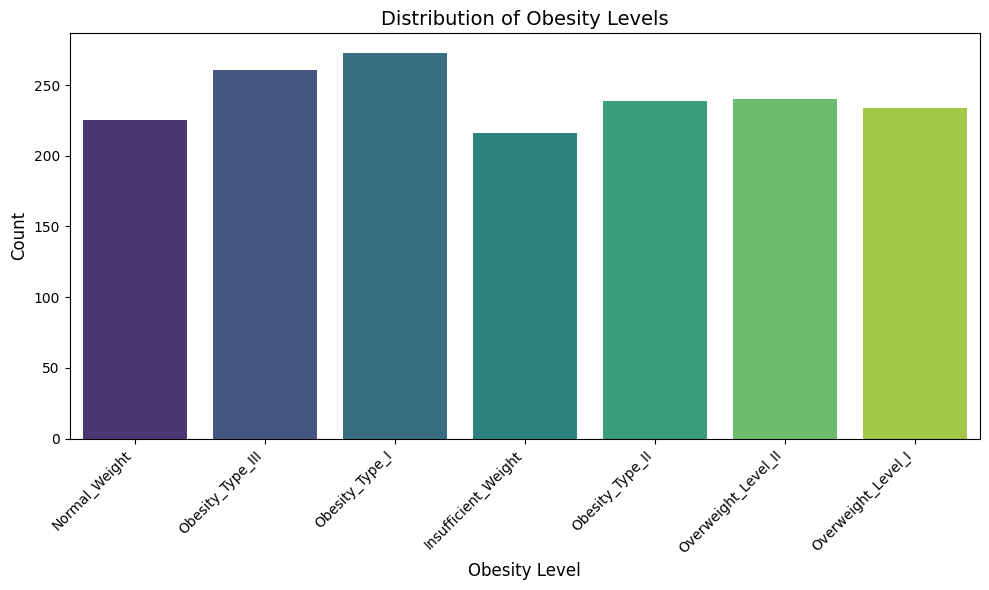

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(x=Y_train, hue=Y_train, palette="viridis")

plt.title('Distribution of Obesity Levels', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


## **Data Preprocessing**

**Handling Missing Values**

In [ ]:
print("Missing values in each column:\n", X_train.isnull().sum())

Missing values in each column:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
dtype: int64


In [ ]:
print("Missing values in target column:\n", Y_train.isnull().sum())

Missing values in target column:
 0


**Handling Duplicates**

In [ ]:
#Checking for Duplicates
train_data = pd.concat([X_train, Y_train], axis=1)
duplicates = train_data.duplicated().sum()
print(f"Number of duplicate records in training data: {duplicates}")

Number of duplicate records in training data: 20


In [ ]:
#Dropping the duplicates
train_data = train_data.drop_duplicates()

In [ ]:
#Checking for duplicates after dropping them
duplicates = train_data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [ ]:

#Seperating again into features and target
X_valtrain = train_data.iloc[:, :-1]
Y_valtrain = train_data.iloc[:, -1]

In [ ]:
print(f"Shape of X_train after cleaning: {X_valtrain.shape}")
print(f"Shape of Y_train after cleaning: {Y_valtrain.shape}")

Shape of X_train after cleaning: (1668, 16)
Shape of Y_train after cleaning: (1668,)


**Treating Outliers in Training Data**

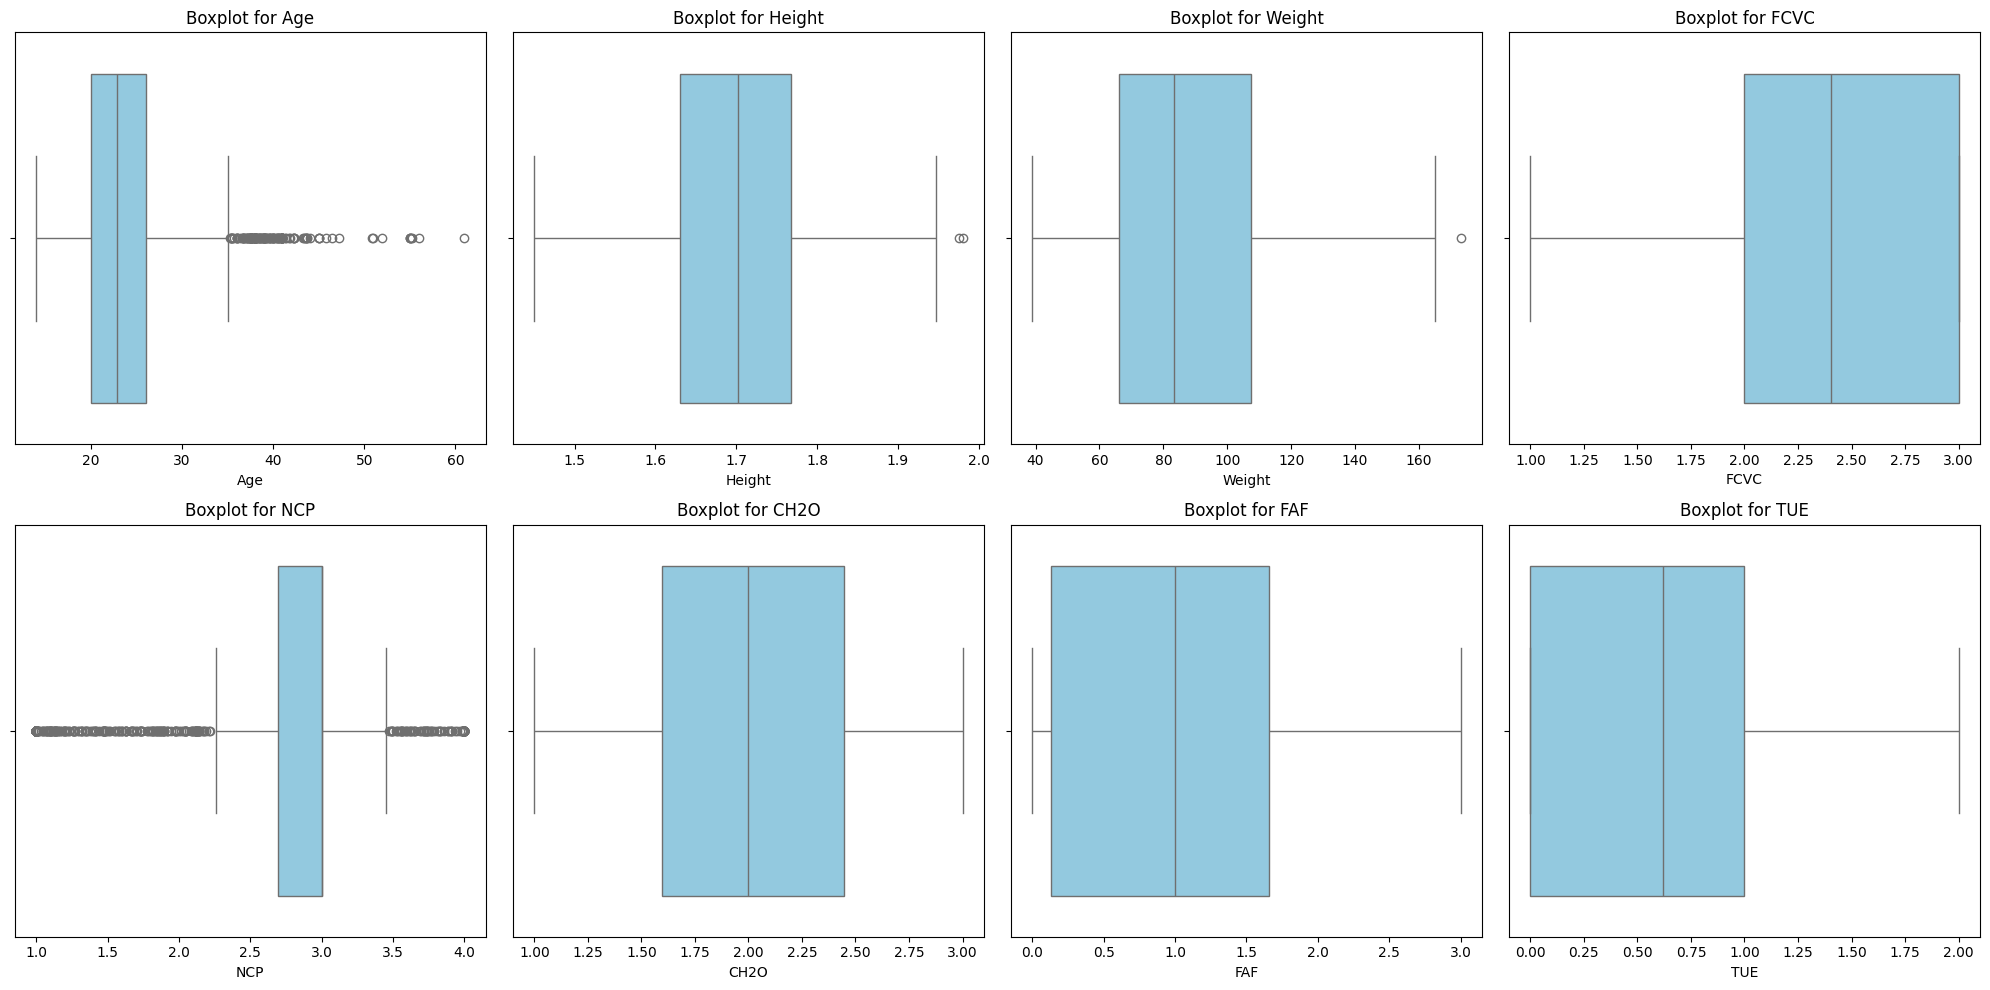

In [ ]:
#Visualizing outliers using box plots
numeric_columns = X_valtrain.select_dtypes(include=['float64', 'int64']).columns

n_cols = 4
n_rows = -(-len(numeric_columns) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=X_valtrain[column], ax=axes[i], color="skyblue")
    axes[i].set_title(f'Boxplot for {column}', fontsize=12)
    axes[i].set_xlabel(column)

for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


In [ ]:
# Outlier count
print("Outliers count for each numeric column:")

for column in numeric_columns:
    Q1 = X_valtrain[column].quantile(0.25)
    Q3 = X_valtrain[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((X_valtrain[column] < lower_bound) | (X_valtrain[column] > upper_bound)).sum()
    print(f"{column}: {outliers} outliers")


Outliers count for each numeric column:
Age: 138 outliers
Height: 2 outliers
Weight: 1 outliers
FCVC: 0 outliers
NCP: 470 outliers
CH2O: 0 outliers
FAF: 0 outliers
TUE: 0 outliers


In [ ]:
#Checking for extreme outliers
print("Outliers count for each numeric column:")

for column in numeric_columns:
    Q1 = X_valtrain[column].quantile(0.25)
    Q3 = X_valtrain[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    outliers = ((X_valtrain[column] < lower_bound) | (X_valtrain[column] > upper_bound)).sum()
    print(f"{column}: {outliers} outliers")

Outliers count for each numeric column:
Age: 16 outliers
Height: 0 outliers
Weight: 0 outliers
FCVC: 0 outliers
NCP: 341 outliers
CH2O: 0 outliers
FAF: 0 outliers
TUE: 0 outliers


**Feature Scaling**

In [ ]:
scaler = StandardScaler()

numerical_columns = X_valtrain.select_dtypes(include=['int64', 'float64']).columns

X_valtrain[numerical_columns] = scaler.fit_transform(X_valtrain[numerical_columns])

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

print("Scaled Training Set:\n", X_valtrain)


Scaled Training Set:
            Age  Gender    Height    Weight       CALC FAVC      FCVC  \
162  -0.537570  Female -0.779396 -1.030355  Sometimes  yes  1.070017   
2001 -0.549118  Female  0.535966  1.791262  Sometimes  yes  1.070017   
1435 -0.245229  Female -0.438938 -0.164316  Sometimes  yes -2.269947   
649  -0.408615  Female -1.229769 -1.634546         no   no  1.070017   
1280  0.231045    Male  1.170088  0.734323  Sometimes  yes  1.070017   
...        ...     ...       ...       ...        ...  ...       ...   
1638  1.199812    Male  0.561998  1.273079  Sometimes  yes  1.009214   
1095 -0.229801    Male  0.175809 -0.199801  Sometimes  yes -0.789397   
1130 -0.231363  Female -0.564697 -0.263806         no  yes -0.789397   
1294 -0.229801  Female -0.799062 -0.091410         no  yes -0.680273   
860  -0.691455    Male  1.233188 -0.072169  Sometimes  yes  0.979241   

           NCP SCC SMOKE      CH2O family_history_with_overweight       FAF  \
162   0.388331  no   yes -0.005386

**Handling Categorical Variables**

In [ ]:
# Using Label Encoding Method
categorical_columns = X_valtrain.select_dtypes(include=['object']).columns

encoder = LabelEncoder()

for col in categorical_columns:
    encoder.fit(X_valtrain[col])

    X_valtrain[col] = encoder.transform(X_valtrain[col])
    X_test[col] = encoder.transform(X_test[col])

print("Encoded Training Set:\n", X_valtrain)

Encoded Training Set:
            Age  Gender    Height    Weight  CALC  FAVC      FCVC       NCP  \
162  -0.537570       0 -0.779396 -1.030355     2     1  1.070017  0.388331   
2001 -0.549118       0  0.535966  1.791262     2     1  1.070017  0.388331   
1435 -0.245229       0 -0.438938 -0.164316     2     1 -2.269947 -1.749857   
649  -0.408615       0 -1.229769 -1.634546     3     0  1.070017 -1.306882   
1280  0.231045       1  1.170088  0.734323     2     1  1.070017  0.388331   
...        ...     ...       ...       ...   ...   ...       ...       ...   
1638  1.199812       1  0.561998  1.273079     2     1  1.009214  0.388331   
1095 -0.229801       1  0.175809 -0.199801     2     1 -0.789397 -1.263365   
1130 -0.231363       0 -0.564697 -0.263806     3     1 -0.789397  0.388331   
1294 -0.229801       0 -0.799062 -0.091410     3     1 -0.680273  0.338933   
860  -0.691455       1  1.233188 -0.072169     2     1  0.979241  0.388331   

      SCC  SMOKE      CH2O  family_histo

**Feature Selection**

In [ ]:
model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=10)

X_valtrain_selected = rfe.fit_transform(X_valtrain, Y_valtrain)

X_test_selected = rfe.transform(X_test)

selected_features = X_valtrain.columns[rfe.support_]

print("Selected Feature Names:\n", selected_features)

Selected Feature Names:
 Index(['Age', 'Gender', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'CAEC'],
      dtype='object')


**Model Training**

Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=20,
    random_state=42,
    max_depth=5 ,
    min_samples_split=5,
    min_samples_leaf=3)

rf_model.fit(X_valtrain, Y_valtrain)




RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=20, random_state=42)

In [ ]:
cv_scores = cross_val_score(rf_model, X_valtrain, Y_valtrain, cv=5, scoring='accuracy')

print(f"Random Forest Cross-Validation Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Y_train_pred = rf_model.predict(X_valtrain)
Y_test_pred = rf_model.predict(X_test)

training_accuracy = accuracy_score(Y_valtrain, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)



print("Classification Report:\n", classification_report(Y_test, Y_test_pred))


Random Forest Cross-Validation Score: 0.8357 ± 0.0159
Training Accuracy: 0.8878896882494005
Test Accuracy: 0.8534278959810875
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.91      0.95      0.93        56
      Normal_Weight       0.78      0.79      0.78        62
     Obesity_Type_I       0.82      0.83      0.83        78
    Obesity_Type_II       0.88      0.98      0.93        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.85      0.73      0.79        56
Overweight_Level_II       0.72      0.66      0.69        50

           accuracy                           0.85       423
          macro avg       0.85      0.85      0.85       423
       weighted avg       0.85      0.85      0.85       423



SVM

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_valtrain, Y_valtrain)




SVC(random_state=42)

In [ ]:
cv_scores = cross_val_score(svm_model, X_valtrain, Y_valtrain, cv=5, scoring='accuracy')

print(f"SVM Cross-Validation Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Y_train_pred = svm_model.predict(X_valtrain)
Y_test_pred = svm_model.predict(X_test)

training_accuracy = accuracy_score(Y_valtrain, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)



print("Classification Report:\n", classification_report(Y_test, Y_test_pred))


SVM Cross-Validation Score: 0.8837 ± 0.0181
Training Accuracy: 0.9316546762589928
Test Accuracy: 0.9219858156028369
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.97        56
      Normal_Weight       0.88      0.82      0.85        62
     Obesity_Type_I       0.96      0.94      0.95        78
    Obesity_Type_II       0.92      0.98      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.81      0.86      0.83        56
Overweight_Level_II       0.93      0.84      0.88        50

           accuracy                           0.92       423
          macro avg       0.92      0.92      0.92       423
       weighted avg       0.92      0.92      0.92       423



## Model Evaluation and Discussion

| **Metric**           | **Random Forest** | **SVM**    |
|-----------------------|-------------------|------------|
| **Train Accuracy**     | 88.79%           | 93.17%     |
| **Test Accuracy**     | 85.34%           | 92.19%     |


### Random Forest:
Random Forest shows good performance on the training set but has a slight drop in accuracy on the test set.

### SVM:
SVM performs well on both the training and test sets.SVM, with a test accuracy of 92.19%, shows better performance in terms of generalization. This suggests that SVM has managed to generalize well to unseen data, outperforming Random Forest on the test set.

## Conclusion

SVM outperforms Random Forest in terms of generalization, with higher test accuracy. Random Forest, though effective on the training set, shows signs of overfitting. Therefore SVM is the preferred choice for this task.

## References




[1]X. Zhou, L. Chen, and H.-X. Liu, “Applications of Machine Learning Models to Predict and Prevent Obesity: A Mini-Review,” Frontiers in Nutrition, vol. 9, p. 933130, Jul. 2022, doi: https://doi.org/10.3389/fnut.2022.933130.




[2]C. Choong, A. Brnabic, Chanadda Chinthammit, Meena Ravuri, K. Terrell, and H. Kan, “Applying machine learning approaches for predicting obesity risk using US health administrative claims database,” BMJ Open Diabetes Research & Care, vol. 12, no. 5, pp. e004193–e004193, Sep. 2024, doi: https://doi.org/10.1136/bmjdrc-2024-004193.


[3]S. A. Thamrin, D. S. Arsyad, H. Kuswanto, A. Lawi, and S. Nasir, “Predicting Obesity in Adults Using Machine Learning Techniques: An Analysis of Indonesian Basic Health Research 2018,” Frontiers in Nutrition, vol. 8, Jun. 2021, doi: https://doi.org/10.3389/fnut.2021.669155.
‌
